In [1]:
from IPython.display import Image

# 문제 설명

* N개의 아파트가 일렬로 쭉 늘어서 있습니다. 이 중에서 일부 아파트 옥상에는 4g 기지국이 설치되어 있습니다. 기술이 발전해 5g 수요가 높아져 4g 기지국을 5g 기지국으로 바꾸려 합니다. 그런데 5g 기지국은 4g 기지국보다 전달 범위가 좁아, 4g 기지국을 5g 기지국으로 바꾸면 어떤 아파트에는 전파가 도달하지 않습니다.

* 예를 들어 11개의 아파트가 쭉 늘어서 있고, [4, 11] 번째 아파트 옥상에는 4g 기지국이 설치되어 있습니다. 만약 이 4g 기지국이 전파 도달 거리가 1인 5g 기지국으로 바뀔 경우 모든 아파트에 전파를 전달할 수 없습니다. (전파의 도달 거리가 W일 땐, 기지국이 설치된 아파트를 기준으로 전파를 양쪽으로 W만큼 전달할 수 있습니다.)

* 초기에, 1, 2, 6, 7, 8, 9번째 아파트에는 전파가 전달되지 않습니다.

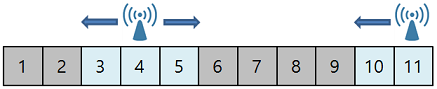

In [2]:
Image('../../../image/기지국설치1.png')

* 1, 7, 9번째 아파트 옥상에 기지국을 설치할 경우, 모든 아파트에 전파를 전달할 수 있습니다.

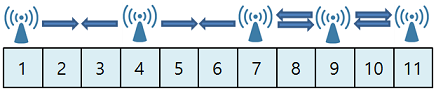

In [3]:
Image('../../../image/기지국설치2.png')

* 더 많은 아파트 옥상에 기지국을 설치하면 모든 아파트에 전파를 전달할 수 있습니다.

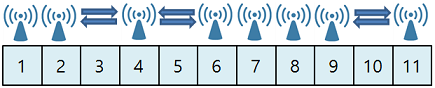

In [4]:
Image('../../../image/기지국설치3.png')

* 이때, 우리는 5g 기지국을 최소로 설치하면서 모든 아파트에 전파를 전달하려고 합니다. 위의 예시에선 최소 3개의 아파트 옥상에 기지국을 설치해야 모든 아파트에 전파를 전달할 수 있습니다.

* 아파트의 개수 N, 현재 기지국이 설치된 아파트의 번호가 담긴 1차원 배열 stations, 전파의 도달 거리 W가 매개변수로 주어질 때, 모든 아파트에 전파를 전달하기 위해 증설해야 할 기지국 개수의 최솟값을 리턴하는 solution 함수를 완성해주세요

 # 제한 사항

* N: 200,000,000 이하의 자연수
* stations의 크기: 10,000 이하의 자연수
* stations는 오름차순으로 정렬되어 있고, 배열에 담긴 수는 N보다 같거나 작은 자연수입니다.
* W: 10,000 이하의 자연수

# 입출력 예

|N|stations|W|answer|
|---|---|---|---|
|11|[4, 11]|1|3|
|16|[9]|2|3|

In [5]:
import math
def solution(n, stations, w):
    answer = 0
    distance = []
    
    distance.append(stations[0]-(w+1))
    distance.append(n-(stations[-1]+w))
    for i in range(1, len(stations)):
        distance.append((stations[i]-w-1) - (stations[i-1]+w))
    
    for d in distance:
        if d <= 0:
            continue
        else:
            answer += math.ceil(d/(2*w+1))

    return answer

In [6]:
for n, stations, w in [[11, [4, 11], 1], [16, [9], 2]] :
    print(solution(n, stations, w))

3
3


# 풀이 과정 및 주의사항

* 전파가 닿지 않는 거리를 먼저 구한다. 
* 맨 앞 기지국 위치-(전파 도달거리+1) 계산하면 기지국 앞쪽 전파가 닿지 않는 거리를 구할 수 있고, 전체 길이 - (마지막 기지국 위치 + 전파 도달거리)를 구할 수 있다.
* 동일하게 기지국 사이의 거리를 구할때에도, (뒤쪽 기지국 위치 - (w+1)) - (앞쪽 기지국 위치 + w)를 계산하면 각 기지국 사이의 거리가 나타난다.
* 해당 거리들을 List에 추가한다. 맨 앞의 기지국이나 맨 뒤의 기지국의 위치가 w보다 작은 경우는 음수 값이 나타날 수 있으므로, List 내의 거리들 중에 양수인 값만 사용하여 (거리 / (전파거리 * 2 + 1))를 올림한 값을 계속해서 더해준다.
* ex) 거리가 7, 전파 도달 거리가 2이면 1개 기지국이 전파를 제공할 수 있는 거리가 5이므로 기지국은 2개가 필요하다.

https://school.programmers.co.kr/learn/courses/30/lessons/12979